In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [24]:
df = pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")

In [25]:
df.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202
4857376,1617148800,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363


In [26]:
df.isnull().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [27]:
df['Date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date

df= df.groupby(df['Date']).mean()

print("length of data set:", len(df))
df.head()

length of data set: 3376


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Date,,,,,,,,
2011-12-31,1.325347e+09,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-01,1.325419e+09,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2012-01-02,1.325506e+09,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
2012-01-03,1.325592e+09,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
2012-01-04,1.325678e+09,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159


In [28]:
df.rename(columns={'Weighted_Price':'cur_price'}, inplace = True)

df[['next_price']] = df[['cur_price']].shift(-1)

df.loc[(df['cur_price']<df['next_price']), 'price_trend'] = 1
df.loc[(df['cur_price']>df['next_price']), 'price_trend'] = 0

df.drop(df.index[-1], axis=0, inplace=True) 

df[['price_trend']] = df[['price_trend']].astype(int)

print("length:", len(df))
df.head()


length: 3375


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),cur_price,next_price,price_trend
Date,,,,,,,,,,
2011-12-31,1.325347e+09,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603,4.806667,1
2012-01-01,1.325419e+09,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667,5.000000,1
2012-01-02,1.325506e+09,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000,5.252500,1
2012-01-03,1.325592e+09,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500,5.208159,0
2012-01-04,1.325678e+09,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159,6.284127,1


In [29]:
data_base_model = df[['Open','High', 'Low', 'Close', 'price_trend']]

data_base_model.tail()

,Open,High,Low,Close,price_trend
Date,,,,,
2021-03-26,53240.386393,53273.505247,53210.861161,53243.124454,1
2021-03-27,55193.240643,55219.665031,55168.757372,55195.415367,1
2021-03-28,55833.608471,55857.735342,55810.425126,55835.012863,1
2021-03-29,56914.886595,56946.213593,56885.242967,56915.629993,1
2021-03-30,58347.805624,58371.955310,58323.956690,58349.357087,1


<AxesSubplot:xlabel='Low'>

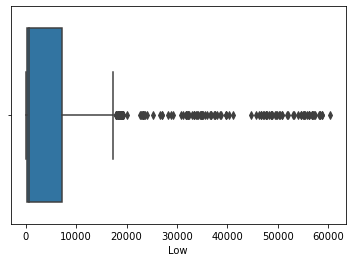

In [30]:
sns.boxplot(data_base_model['Low'])

In [31]:
data_base_model['Low']=np.log(data_base_model['Low'])
data_base_model['Close']=np.log(data_base_model['Close'])
data_base_model['High']=np.log(data_base_model['High'])
data_base_model['Open']=np.log(data_base_model['Open'])

<AxesSubplot:xlabel='Low', ylabel='Density'>

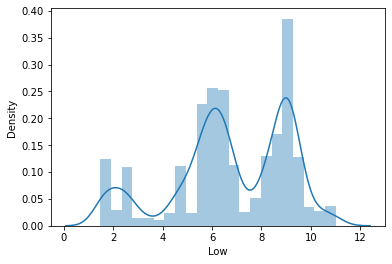

In [32]:
sns.distplot(data_base_model['Low'])

In [33]:
y = data_base_model['price_trend']
x = data_base_model.drop('price_trend',1)
print(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.36, random_state=0)

len(x_train),len(x_test), len(y_train), len(y_test)

                 Open       High        Low      Close
Date                                                  
2011-12-31   1.496269   1.500181   1.496269   1.500181
2012-01-01   1.570004   1.570004   1.570004   1.570004
2012-01-02   1.609438   1.609438   1.609438   1.609438
2012-01-03   1.658704   1.658704   1.658704   1.658704
2012-01-04   1.648659   1.653136   1.648659   1.653136
...               ...        ...        ...        ...
2021-03-26  10.882573  10.883194  10.882018  10.882624
2021-03-27  10.918596  10.919074  10.918152  10.918635
2021-03-28  10.930131  10.930563  10.929716  10.930156
2021-03-29  10.949312  10.949862  10.948791  10.949325
2021-03-30  10.974177  10.974591  10.973768  10.974204

[3375 rows x 4 columns]


(2160, 1215, 2160, 1215)

In [34]:
clf = LogisticRegression(solver='lbfgs')
clf.fit(x_train, y_train)

LogisticRegression()

In [35]:
y_pred=clf.predict(x_test)
score = clf.score(x_test, y_test)
print("Accurancy of model:",score)

Accurancy of model: 0.562962962962963


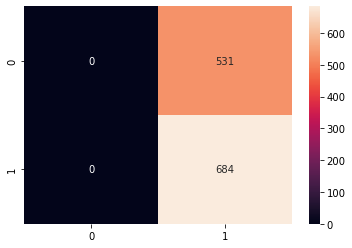

In [36]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt='d')
plt.show()